# Hotel Bookings Study - Final Project#
## Ralph Khreish ## 

** Comments by Instructor **


### What I am working on
** Dota 2 Matches study**  
** What is the desired outcome of your project: I would like to prove through the power of data that there is indeed a significant difference between experienced players and less experienced players. Also known as, noobs and pros. **  
** Data Source: https://www.kaggle.com/jessemostipak/hotel-booking-demand **   
** Data Explanation: https://www.sciencedirect.com/science/article/pii/S2352340918315191 **

**Load packages:**

In [27]:
# Import packages/libraries here
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import glob

### 1. Load Data

---

In [28]:
hotel_bookings = pd.read_csv('hotel_bookings.csv')

### 2. Describe the Basic Format of your Data and the Columns

---

Use the `.head()` method (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. 

The `.dtypes` attribute tells you the data type for each of your columns.

In [29]:
# hotel: can be a Resort Hotel or a City Hotel
# is_canceled: indicates if the reservation was canceled
# lead_time: displays how many days in advance the reservation was booked
# arrival_date_year: displays the arrival date year of the reservation
# arrival_date_month: displays the arrival date month of the reservation
# arrival_date_week_number: displays the arrival date week of the reservation
# arrival_day_of_month: displays the day of the month of the reservation
# stays_in_weekend_nights: displays how many days of the reservation were a weekend
# stays_in_week_nights: displays how many days of the reservation were a weekday
# adults: displays how many adults are in the reservation
# children: displays how many children are in the reservation
# babies: displays how many babies are in the reservation
# meal: displays what type of meal plan was booked
# (SC/Undefined: no meal package, BB: Bed and Breakfast, HB: Half Board Breakfast, breakfast and another meal, usually dinner,
# FB: Full board, breakfast, lunch, and dinner)
# country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
# market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
# distribution_channel: Booking distribution channel.
# is_repeated_guest: bool indicating if the guest is a repeated guest or not (1 indicating yes)
# previous_cancellations: number of previous cancellations they have had
# previous_bookings_not_canceled: total amount of bookings not cancelled
# reserved_room_type: Code of room type reserved.
# assigned_room_type: Code for the type of room assigned to the booking.
# booking_changes: Number of changes/amendments made to the booking from the moment the booking was created
# deposit_type: Indication on if the customer made a deposit to guarantee the booking.
#               3 Unique Values: - No deposit
#                                - Non Refundable
#                                - Refundable
# agent: ID of the travel agency that made the booking (has 'null' value that should be changed to actual null)
# company: ID of the company/entity that made the booking or responsible for paying the booking. (has 'null' value that should be changed to actual null)
# days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
# customer_type: Type of booking, assuming one of four categories:
#                                 - Contract - when the booking has an allotment or other type of contract associated to it;
#                                 - Group – when the booking is associated to a group;
#                                 - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
#                                 - Transient-party – when the booking is transient, but is associated to at least other transient booking                               
# adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
# required_car_parking_spaces: Number of car parking spaces required by the customer
# total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
# reservation_status: Reservation last status, assuming one of three categories:
#                     - Canceled – booking was canceled by the customer;
#                     - Check-Out – customer has checked in but already departed;
#                     - No-Show – customer did not check-in and did inform the hotel of the reason why
# reservation_status_date: Date at which the last status was set. 
#                          This variable can be used in conjunction with the ReservationStatus to understand when was the booking 
#                          canceled or when did the customer checked-out of the hotel

print(hotel_bookings.dtypes)
hotel_bookings.head()

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


---

Use the `.info()` method  to see how many rows and data types you have. This will also tell you how many rows of each column have non nan values

Describe what you see

In [30]:
# This table has all non-null objects
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

### 3. Drop unwanted columns

---



You may want to focus on selected columns as either input features or simply for analysis. You can drop those unwanted columns.

The `.drop()` method can be used to get rid of a column. When removing a column, you need to specify `axis=1`.

In [31]:
# For the moment, we don't have any unwanted columns


### 4. (Optional) Convert your object based columns to numeric. 

---

Did you notice when you examined the `dtypes` attribute that some of the columns were of type "object", indicating that they are strings. For some cases, these columns should be numeric (particularly if you want to apply some algorithm to it). This is not always straightforward.


### 5. Determine how many observations are missing

---
Even for visualizing your data, missing values can become a problem. 

If you want to build models with your data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing and for which columns.

A handy way to look at how many null values there are in each column with pandas is:

```python
df.isnull().sum()
```

In [32]:
# How many columns have null values?
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Either remove rows with nans or impute them (fill in with a value). Deciding on how to impute values is actually an entire field of research, but [there are a variety of options for this](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

In [33]:
hotel_bookings.children.fillna(0, inplace=True)
hotel_bookings.country.fillna('', inplace=True)
hotel_bookings.agent.fillna(-1, inplace=True)
hotel_bookings.company.fillna(-1, inplace=True)
hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### (Optional) 6. Make the column names more descriptive

---

There is more than one way to do this, but one easy way is to use the `.rename()` method


There two popular ways to rename dataframe columns.
1. Using a _dictionary substitution_, which is very useful if you only want to rename a few of the columns. This way uses the `.rename()` method.
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names. Students are more likely to mess this way up.

### 7. Describe the summary statistics for the columns

---

The `.describe()` function gives summary statistics for each of your columns. What are some, if any, oddities you notice about the columns based on this output?

In [11]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 8. Plot variables with potential outliers. You can do any sort of plotting. You can try to use boxplots.

If you want to learn about boxplots, I wrote an article about boxplots [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51). 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

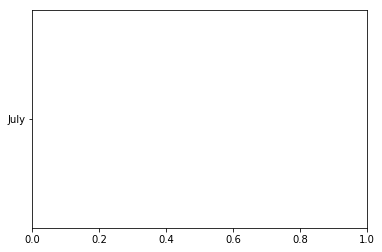

In [43]:
barWidth = 0.25

bar_2015 = hotel_bookings.loc[hotel_bookings.arrival_date_year == 2015]
bar_2016 = hotel_bookings.loc[hotel_bookings.arrival_date_year == 2016]
bar_2017 = hotel_bookings.loc[hotel_bookings.arrival_date_year == 2017]

bar_2015 = bar_2015.arrival_date_month
bar_2016 = bar_2016.arrival_date_month
bar_2017 = bar_2017.arrival_date_month

group_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                 'October', 'November', 'December']

r1 = np.arange(len(group_labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bar_2015.arrival_date_month, width=barWidth, edgecolor='white', label='2015')
plt.bar(r2, bar_2016.arrival_date_month, width=barWidth, edgecolor='white', label='2016')
plt.bar(r3, bar_2017.arrival_date_month, width=barWidth, edgecolor='white', label='2017')

# Add xticks in the middle of the group bars
plt.xlabel('month', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(group_labels))], group_labels)

# Create legend & Show graphic
plt.legend()
plt.show()



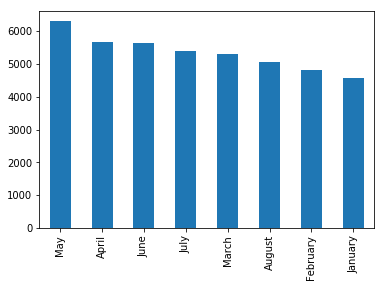

In [56]:
bar_2015 = hotel_bookings.loc[hotel_bookings.arrival_date_year == 2015]
bar_2016 = hotel_bookings.loc[hotel_bookings.arrival_date_year == 2016]
bar_2017 = hotel_bookings.loc[hotel_bookings.arrival_date_year == 2017]

bar_2015 = bar_2015.arrival_date_month
bar_2016 = bar_2016.arrival_date_month
bar_2017 = bar_2017.arrival_date_month

bar_2015_months = bar_2015.value_counts(dropna = False)
bar_2015_months.plot.bar()

bar_2016_months = bar_2016.value_counts(dropna = False)
bar_2016_months.plot.bar()

bar_2017_months = bar_2017.value_counts(dropna = False)
bar_2017_months.plot.bar()


### 9.Other relevants plots 

---
What can you infer out of these additonal plots as related to your problem? Simply making relevant plots could be an entire project. 